In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [2]:
import os

print(os.listdir("C:\\Users\\ajaohri\\Desktop\\all"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [3]:
url_train = 'C:\\Users\\ajaohri\\Desktop\\all/train.csv'
titanic = pd.read_csv(url_train)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


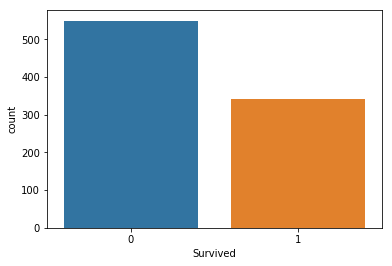

In [4]:
#Checking if our target variable is binary or not
sb.countplot(x='Survived',data=titanic)

In [5]:
#Checking Null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping PassengerId, Name and Ticket because they are unique.
Dropping Cabin because of too many null values.

In [6]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket'],1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Now need to take care of the missing data for Age variable. Need to approximate- one way, to take mean age for all the missing values.
Or, find if age is related to Pclass, and assign respective means.

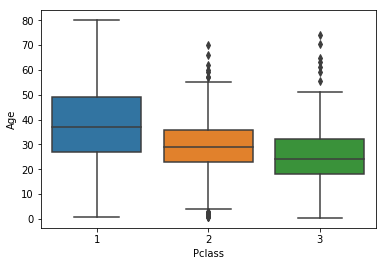

In [7]:
sb.boxplot(x='Pclass',y='Age',data=titanic_data)

If Passenger belongs to Pclass 3, age assigned is 24, if 2, age is assigned 29, if 1 then 37.

In [8]:
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [9]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
def cabin_approx(cols):
    cabin = cols[0]
    pclass = cols[1]
    if pd.isnull(cabin):
        return 0
    elif cabin[0] == ('C' or 'B'):
        return 3
    elif cabin[0] == ('A' or 'D' or 'E' or 'T'):
        return 2
    elif cabin[0] == ('F' or 'G'):
        return 1
    else:
        return 0

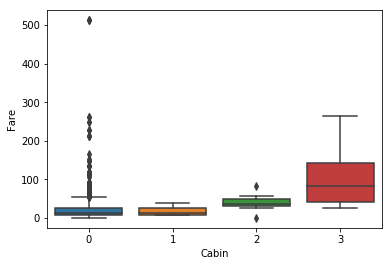

In [11]:
titanic_data['Cabin'] = titanic_data[['Cabin', 'Pclass']].apply(cabin_approx, axis=1)
#titanic_data.isnull().sum()
sb.boxplot(x='Cabin',y='Fare',data=titanic_data)

There are two null values in Embarked, we can just drop them.

In [12]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Getting dummy variables from categorical ones.

In [13]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
titanic_data.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,3
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,3
4,0,3,35.0,0,0,8.0500,0


In [16]:
titanic_dmy = pd.concat([titanic_data, gender, embark_location],axis=1)
titanic_dmy.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
886,0,2,27.0,0,0,13.00,0,1,0,1
887,1,1,19.0,0,0,30.00,0,0,0,1
888,0,3,24.0,1,2,23.45,0,0,0,1
889,1,1,26.0,0,0,30.00,3,1,0,0
890,0,3,32.0,0,0,7.75,0,1,1,0


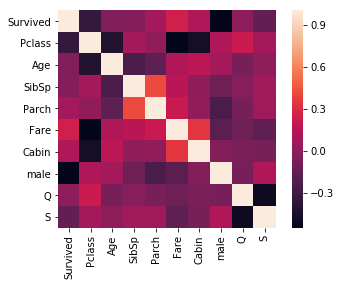

In [17]:
#Checking for correlation between variables.
sb.heatmap(titanic_dmy.corr(),square=True)
#print(titanic_dmy.corr())

In [18]:
X = titanic_dmy.ix[:,(1,2,3,4,5,6,7,8,9)].values
y = titanic_dmy.ix[:,0].values
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=2)

C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new C

The train test split is done for parameter tuning.
We now deploy the models.

In [20]:
!pip install xgboost

In [24]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier

clf1 = SVC(kernel='linear',C=1.0,random_state=3)
clf2 = XGBClassifier(random_state=3)
clf3 = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=300)
eclf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2),('clf3',clf3)], voting='hard')

eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(eclf.score(X_test, y_test))

[[47  5]
 [11 26]]
0.8202247191011236


C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\

**Now taking in Competition Data.**

In [25]:
url = 'C:\\Users\\ajaohri\\Desktop\\all/test.csv'
test = pd.read_csv(url)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 null values in Age, so we approximate them like we did earlier.
There are 327 null values in Cabin, so we drop it altogether.
There is 1 null value in Fare, so we approximate it according to the median of each class of the null position.

In [27]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


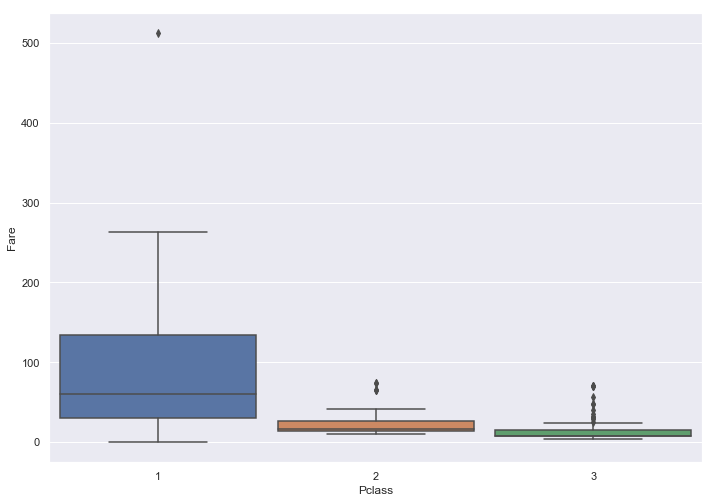

In [28]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
ax = sb.boxplot(x='Pclass',y='Fare',data=test,width=0.9)

In [29]:
def fare_approx(cols):
    fare = cols[0]
    pclass = cols[1]
    if pd.isnull(fare):
        if pclass == 1:
            return 55
        elif pclass == 2:
            return 20
        else:
            return 10
    else:
        return fare

**Cleaning up the test data:**
Dropping variables, approximating age and fare, dummy variables.

In [30]:
test_data = test.drop(['Name','Ticket'],1)
test_data['Age'] = test_data[['Age', 'Pclass']].apply(age_approx, axis=1)
test_data['Fare'] = test_data[['Fare','Pclass']].apply(fare_approx, axis=1)
test_data['Cabin'] = test_data[['Cabin','Pclass']].apply(cabin_approx, axis=1)
#
gender_test = pd.get_dummies(test_data['Sex'],drop_first=True)
embark_location_test = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Sex','Embarked'],axis=1,inplace=True)
test_dmy = pd.concat([test_data, gender_test, embark_location_test],axis=1)

#test_dmy.describe()
test_data.dropna(inplace=True)
test_dmy.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
male           0
Q              0
S              0
dtype: int64

In [31]:
test_dmy.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


In [32]:
X_competition = test_dmy.ix[:,(1,2,3,4,5,6,7,8,9)].values

C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


**Prediction for Competition Data**

In [33]:
y_comp = eclf.predict(X_competition)

C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ajaohri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':y_comp})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [35]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv


In [38]:
os.getcwd()


'C:\\Users\\ajaohri'